In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv("hate-crime-gmp-CSV.csv")
df

,Unnamed: 0,01/01/2010,01/02/2010,01/03/2010,01/04/2010,01/05/2010,01/06/2010,01/07/2010,01/08/2010,01/09/2010,...,01/12/2030,01/01/2031,01/02/2031,01/03/2031,01/04/2031,01/05/2031,01/06/2031,01/07/2031,01/08/2031,01/09/2031
0,NaN,31/01/2010,28/02/2010,31/03/2010,30/04/2010,31/05/2010,30/06/2010,31/07/2010,31/08/2010,30/09/2010,...,31/12/2030,31/01/2031,28/02/2031,31/03/2031,30/04/2031,31/05/2031,30/06/2031,31/07/2031,31/08/2031,30/09/2031
1,Recorded hate crime counts,Jan-2010,Feb-2010,Mar-2010,Apr-2010,May-2010,Jun-2010,Jul-2010,Aug-2010,Sep-2010,...,Dec-2030,Jan-2031,Feb-2031,Mar-2031,Apr-2031,May-2031,Jun-2031,Jul-2031,Aug-2031,Sep-2031
2,GMP,304,309,337,338,319,465,332,323,298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City of Manchester North,22,23,25,24,17,30,32,33,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,City of Manchester Central,26,40,25,40,32,52,39,22,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Bury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,Rochdale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,Oldham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,Manchester Airport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing

In [59]:
df.drop([0,1],inplace=True) # remove the first NaN row
totalCrimes_df = df[:15] # only the first 16 rows are needed # Change to 15 for datetime change
totalCrimes_df.dropna(axis=1,inplace=True) # Drop all NaN columns 
totalCrimes_df.reset_index(drop=True,inplace=True) # Correct the index

# Set new indexes
totalCrimes_df.set_index("Unnamed: 0",inplace=True)
totalCrimes_df.replace(',','',regex=True, inplace=True) # Remove the commas from values > 999
totalCrimes_df= totalCrimes_df.apply(pd.to_numeric)  # Convert all values to integers
totalCrimes_df.index.name = None
totalCrimes_df.columns = pd.to_datetime(totalCrimes_df.columns, format="%d/%m/%Y")

In [39]:

totalCrimes_df

,2010-01-01,2010-02-01,2010-03-01,2010-04-01,2010-05-01,2010-06-01,2010-07-01,2010-08-01,2010-09-01,2010-10-01,...,2024-11-01,2024-12-01,2025-01-01,2025-02-01,2025-03-01,2025-04-01,2025-05-01,2025-06-01,2025-07-01,2025-08-01
GMP,304,309,337,338,319,465,332,323,298,322,...,799,708,778,776,883,902,953,1048,1108,1105
City of Manchester North,22,23,25,24,17,30,32,33,14,22,...,67,93,97,73,90,76,89,94,107,114
City of Manchester Central,26,40,25,40,32,52,39,22,36,28,...,118,97,122,114,135,138,151,155,150,153
City of Manchester South,25,28,29,25,27,55,25,27,28,25,...,53,60,64,43,57,62,83,85,83,55
Salford,41,33,38,50,40,54,45,56,36,58,...,82,59,68,88,99,82,88,109,118,106
Tameside,33,27,35,17,27,30,21,17,27,21,...,53,50,40,58,53,71,68,72,66,69
Stockport,19,13,21,23,14,24,27,23,11,11,...,53,56,40,42,47,57,73,76,95,75
Bolton,20,24,38,24,37,40,23,37,17,27,...,70,46,71,72,74,93,73,86,116,102
Wigan,21,13,20,24,17,47,15,11,19,22,...,50,45,63,68,74,48,55,66,62,78
Trafford,13,18,15,14,14,26,16,11,12,14,...,64,48,38,43,58,59,69,64,66,79


# Let's visualise the last 10 years of data as a time series!

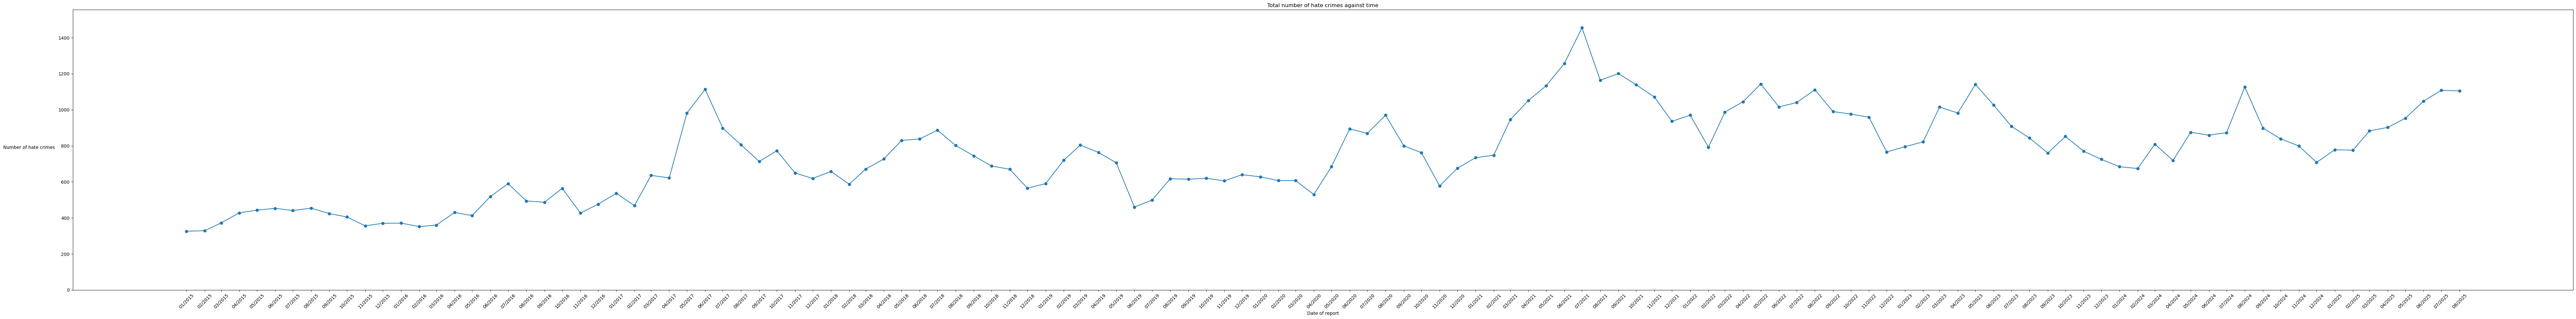

In [68]:
import matplotlib.axis as axis
fig, ax = plt.subplots(1, 1, figsize=[80, 10])
GMP_series = totalCrimes_df.loc["GMP", totalCrimes_df.columns >= "2015-01-01"]

ax.plot(GMP_series.index,GMP_series,marker="o")
ax.set_xticks(GMP_series.index) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.ylim(0, GMP_series.max()+100)
plt.ylabel("Number of hate crimes",rotation="horizontal",labelpad = 65)
plt.title("Total number of hate crimes against time")
#plt.legend()
plt.xticks(rotation=45)
plt.xlabel("Date of report")
plt.savefig('./GMP_timeSeries.svg')
plt.tight_layout()
plt.show()

## Create the animation of the time series

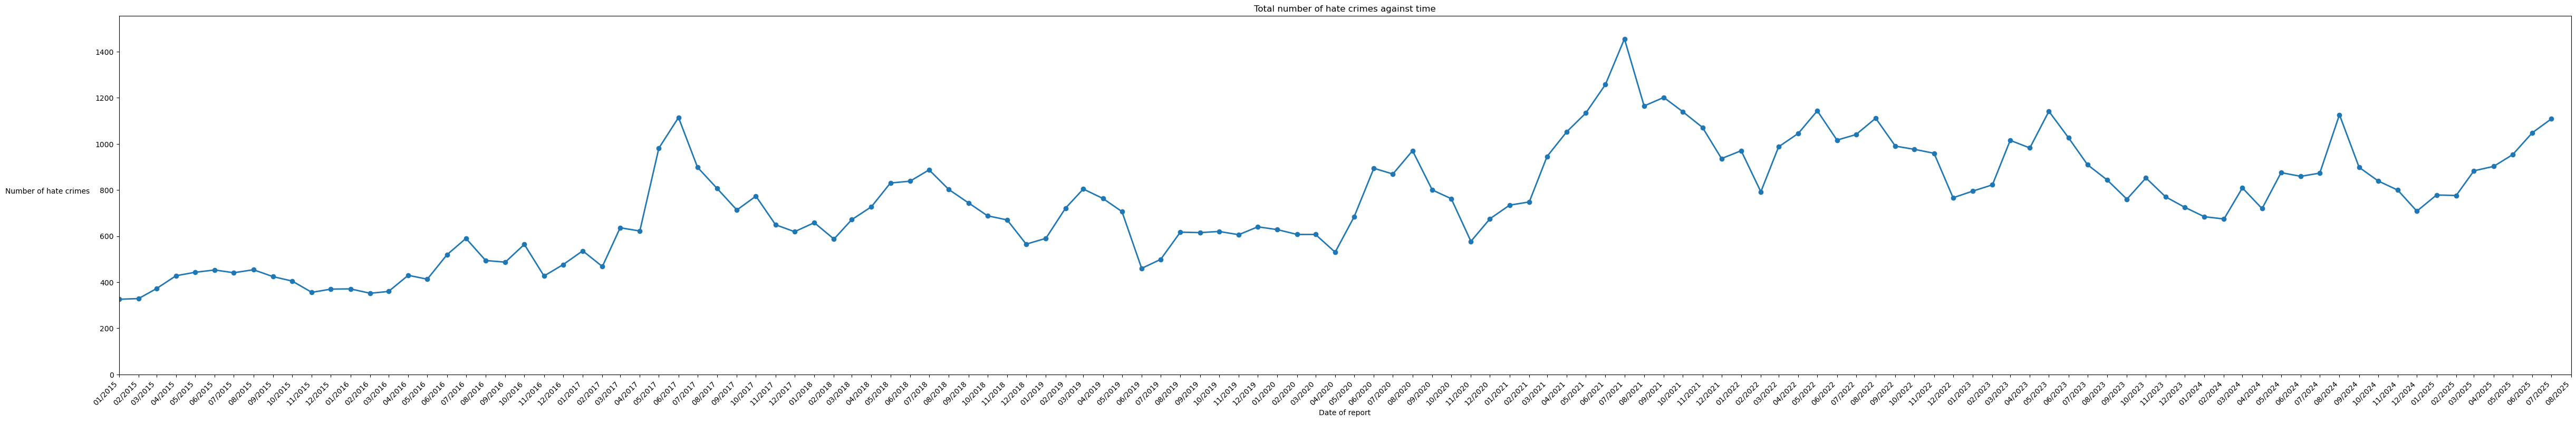

In [69]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=[60,10])

ln, = ax.plot([], [], lw=2)
ax.set_xticks(GMP_series.index) 
ax.set_ylim(0, GMP_series.values.max()+100)
ax.set_xlim(GMP_series.index.min(), GMP_series.index.max())
plt.xlabel("Date of report")
plt.title("Total number of hate crimes against time")
plt.ylabel("Number of hate crimes",rotation="horizontal",labelpad = 65)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
fig.autofmt_xdate()
plt.xticks(rotation=45)
def init():
    ln.set_data([],[])
    return ln,

def update(frame):
    ln.set_data(GMP_series.index[:frame],GMP_series.values[:frame])
    ln.set_marker("o")
    return ln,

ani = FuncAnimation(fig, update, frames=len(GMP_series), init_func=init,blit=True, interval = 1)
ani.save("timeseries.gif", writer="pillow")
plt.show()